# Test Lackey et al 2013 LAL implementation

MP 01/2016

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import lal
import lalsimulation as LS

In [3]:
q = 3 # eta > 6/49.
mNS = 1.35
M = (1. + q) * mNS
mBH = M - mNS
chi_BH = 0.5
Lambda = 2000

phiRef = 0
deltaF = 0.5
fLow = 10
fHigh = 4096
fRef = 10
distance = 100e6*lal.PC_SI 
inclination = pi/4
#inclination = pi/2
mBH_SI = mBH * lal.MSUN_SI
mNS_SI = mNS * lal.MSUN_SI

In [125]:
#freqs.data = np.array([10, 50, 100, 350, 900, 2000, 3500])
#freqs.data = np.linspace(10, 3500, n)

In [6]:
Hp, Hc = LS.SimIMRLackeyTidal2013(phiRef, deltaF, fLow, fHigh, fRef, distance, inclination, mBH_SI, mNS_SI, chi_BH, Lambda)
HpP, HcP = LS.SimIMRLackeyTidal2013(phiRef, deltaF, fLow, fHigh, fRef, distance, inclination, mBH_SI, mNS_SI, chi_BH, 0)

HpR, HcR = LS.SimIMRSEOBNRv2ROMDoubleSpinHI(phiRef, deltaF, fLow, fHigh, fRef, distance, inclination, mBH_SI, mNS_SI, chi_BH, 0, -1)

f = np.arange(Hp.data.length)*deltaF


# Create frequency sequence
f_in = f[20::4]
n = len(f_in)
freqs = lal.CreateREAL8Sequence(n)
freqs.data = f_in

HpS, HcS = LS.SimIMRLackeyTidal2013FrequencySequence(freqs, phiRef, fRef, distance, inclination, mBH_SI, mNS_SI, chi_BH, Lambda)
HpRS, HcRS = LS.SimIMRSEOBNRv2ROMDoubleSpinHIFrequencySequence(freqs, phiRef, fRef, distance, inclination, mBH_SI, mNS_SI, chi_BH, 0, -1)

h = Hp.data.data + 1j*Hc.data.data
hP = HpP.data.data + 1j*HcP.data.data
hS = HpS.data.data + 1j*HcS.data.data
hR = HpR.data.data + 1j*HcR.data.data

In [7]:
# sanity check: setting Lambda = 0 produces the unmodified ROM:
print np.allclose(hP, hR)

True


If the inclination is not 0 or pi/2, the amplitude between the FS and standard LAL version disagrees. This seems to be coming from the ROM. Need to understand why this happens.

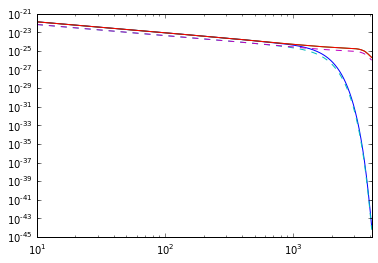

In [8]:
f = np.arange(Hp.data.length)*deltaF
loglog(f, abs(h))
loglog(f, abs(hP))
loglog(f, abs(hR))
loglog(freqs.data, abs(HpS.data.data), '--')
loglog(freqs.data, abs(HpRS.data.data), '--')
xlim([fLow,fHigh]);

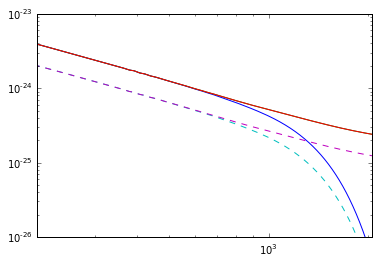

In [9]:
loglog(f, abs(h))
loglog(f, abs(hP))
loglog(f, abs(hR))
loglog(freqs.data, abs(HpS.data.data), '--')
loglog(freqs.data, abs(HpRS.data.data), '--')
xlim([200,2048]);
ylim([1e-26, 1e-23]);

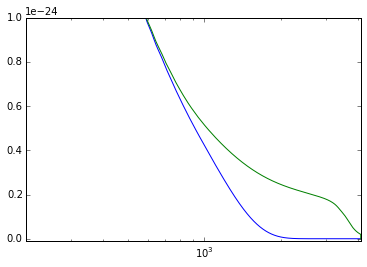

In [10]:
semilogx(f, abs(h))
semilogx(f, abs(hP))
xlim([200,fHigh]);
ylim([-0.1e-25,0.1e-23]);

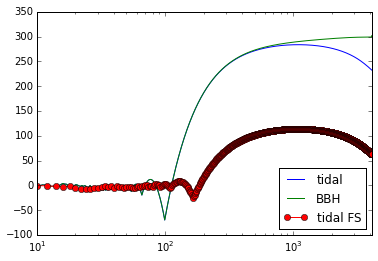

In [11]:
phi = unwrap(angle(h))
phiP = unwrap(angle(hP))
phiS = unwrap(angle(hS)) # phasing is different if the frequences are not the same

semilogx(f, phi, label='tidal')
semilogx(f, phiP, label='BBH')
semilogx(freqs.data, phiS, 'o-', label='tidal FS')
legend(loc='lower right')
xlim([fLow,fHigh]);

The tidal phasing should behave as in Fig. 8 of Lackey et al and fall off near merger:

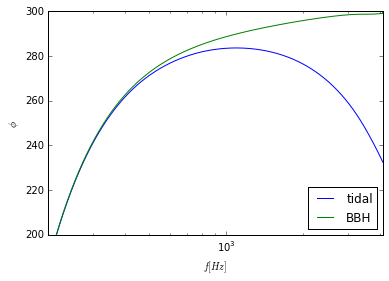

In [101]:
phi = unwrap(angle(h))
phiP = unwrap(angle(hP))
semilogx(f, phi, label='tidal')
semilogx(f, phiP, label='BBH')
legend(loc='lower right')
xlabel(r'$f [Hz]$')
ylabel(r'$\phi$')
xlim([200,fHigh]);
ylim([200,300]);

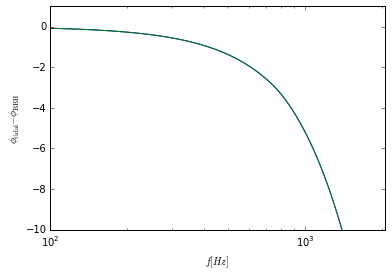

In [9]:
semilogx(f, phi - phiP)
semilogx(f, unwrap(angle(Hp.data.data) - angle(HpP.data.data)))
xlabel(r'$f [Hz]$')
ylabel(r'$\phi_\mathrm{tidal} - \phi_\mathrm{BBH}$')
xlim([100,2048]);
ylim([-10,1]);

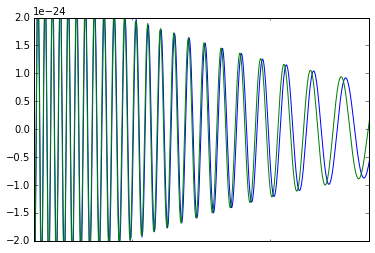

In [10]:
semilogx(f, real(Hp.data.data))
semilogx(f, real(HpP.data.data))
xlim([150,400]);
ylim([-0.2e-23,0.2e-23]);